In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models,layers,optimizers,utils,metrics

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [4]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [12]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mae_history = history.history['mae']
    all_scores.append(val_mae)
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [13]:
all_scores

[2.5222504138946533,
 2.5773098468780518,
 2.6941516399383545,
 2.5018463134765625]

In [14]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print('All fold validation Errors: ', all_scores)
print('Mean of All Validation Errors:', np.mean(all_scores))
print('average_mae_history:', average_mae_history)

All fold validation Errors:  [2.5222504138946533, 2.5773098468780518, 2.6941516399383545, 2.5018463134765625]
Mean of All Validation Errors: 2.5738895535469055
average_mae_history: [10.873138904571533, 3.862114727497101, 3.179957330226898, 2.8123772740364075, 2.587061643600464, 2.4784039855003357, 2.3946537375450134, 2.3519821166992188, 2.2978641390800476, 2.2239556908607483, 2.206793248653412, 2.199907660484314, 2.1493738889694214, 2.1246403455734253, 2.09539595246315, 2.0794112980365753, 2.070540130138397, 2.0110961496829987, 2.008341461420059, 2.0062608420848846, 1.956629753112793, 1.9458658993244171, 1.957646906375885, 1.9418421685695648, 1.9004265367984772, 1.8960179388523102, 1.9019788801670074, 1.8739048540592194, 1.8344913721084595, 1.8302134573459625, 1.837207168340683, 1.842819631099701, 1.8013959527015686, 1.7969734072685242, 1.7858429253101349, 1.7656141817569733, 1.7508870959281921, 1.7744896709918976, 1.7506715655326843, 1.7640888690948486, 1.7211412489414215, 1.702581942

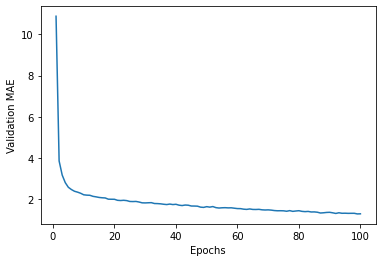

In [16]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [17]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 18.9778 - mae: 2.7055


In [18]:
test_mae_score

2.7054500579833984